# Parallel Programming with Dask

Dask is a free Python tool designed to handle parallel computing by extending familiar libraries like Pandas, NumPy, and Scikit-Learn. It allows tasks to be distributed across multiple CPU cores or even clusters of computers, making it ideal for managing large datasets and complex calculations that exceed the memory capacity of a single machine. With a dynamic task scheduler and a focus on user-friendliness, Dask simplifies the process of scaling from single-machine operations to distributed computing, making advanced data processing more accessible and efficient.

This is how Dask works:

<img src="https://raw.githubusercontent.com/dask/dask/main/docs/source/images/dask-overview.svg" 
     width="75%"
     alt="Dask overview\" />

*Source: Coiled Dask Tutorial (https://github.com/coiled/dask-mini-tutorial/tree/main)*

In Dask, large datasets are represented as collections like Dask DataFrames, Dask Arrays, etc. Operations on these collections don't compute everything right away, instead they are translated into a task graph. This task graph is a map of small, independent computations (tasks) connected by the data they produce and consume. Finally, a scheduler decides how to efficiently run these tasks across multiple cores or machines.

Imagine you have a giant puzzle that won't fit on your table, so you break it into smaller pieces. Dask treats big data like that puzzle. It splits the data into manageable chunks. Then, instead of immediately solving the entire puzzle, Dask makes a plan of what needs to be done for each chunk. This plan is like a task graph, showing how the smaller jobs connect. Finally, Dask uses a scheduler, like a smart foreman, to assign these tasks to different workers (cores on your computer) to solve them all simultaneously, finishing the giant puzzle much faster.

### Dask Task Graphs
Dask relies on task graphs to represent and manage computations. A task graph is a directed acyclic graph (DAG) that describes the sequence of operations and dependencies in a computation. 

Components of a Dask Task Graph:
- Tasks:
    - Tasks are units of computation represented by individual operations on the data, such as arithmetic operations, function applications, or reductions.
- Dependencies:
     - Dependencies define the relationships between tasks, indicating which tasks need to be completed before others can begin.
- Graph:
    - The entire task graph is a collection of interconnected tasks and dependencies.


## Dask Delayed
Dask delayed is a powerful tool in the Dask library that allows you to parallelize your existing Python code. It operates by creating delayed objects, which encapsulate function calls and their parameters as a task graph. This graph represents the computation to be performed and can be executed efficiently in a parallel or distributed manner.

Dask implements lazy evaluation as a fundamental concept to efficiently manage and execute computations on large datasets. The core idea behind lazy evaluation is to delay the actual computation until the result is explicitly needed. 

Dask accomplishes this through the following key mechanisms:

### Delayed Objects
Dask utilizes the **dask.delayed** module to create delayed objects, which represent computations to be executed later. These delayed objects capture the operations or functions applied to data but don't execute them immediately. Instead, they construct a task graph. The *dask.delayed* decorator (**@delayed**) serves as a transformative tool, converting normal Python functions into delayed functions. 

Lets work on an example where we will create a delayed function and delayed objects where we add numbers:

In [1]:
import dask
from dask import delayed

@delayed
def add(x, y):
    return x + y

result = add(1, 2) + add(3, 4)
result

Delayed('add-465c6a212853abc0d18cd416ddc86326')

When we run this code, we see that we don't obtain the result value right away, as we would normally expect. Instead, it returns the delayed object.

Dask's **delayed** is a way to create computations lazily, meaning that when you define 'result', Dask doesn't actually perform the addition operations right away. Instead, it constructs a task graph that describes what operations should be done and how they depend on each other.

In our code, **add(1, 2)** and **add(3, 4)** are both ***delayed operations***. When we perform **add(1, 2) + add(3, 4)**, it creates a new delayed object that represents the sum of the results of these two delayed calls, not the actual integer result.

To actually execute the computation and get the result, we need to use the **.compute()** method on the final result object:

In [3]:
result.compute()

10

Now, lets visualize how the task graph looks like.

First, go to your terminal and run the following command:
***conda install python-graphviz***

This will install graphviz which is a tool for creating and displaying diagrams of connected nodes, and in JupyterLab, it's used to visualize the steps and dependencies in a series of tasks, like those created by Dask, to help you understand how your computations are organized.

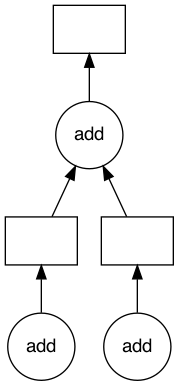

In [4]:
# Visualizing a task graph
result.visualize()

**Explanation of the Task Graph:**

*Tasks:*
- add(1, 2): This creates a task to add the numbers 1 and 2.
- add(3, 4): This creates a task to add the numbers 3 and 4.

*Dependency:*
- The result of add(1, 2) and add(3, 4) are then added together to form the final result. This addition itself is a task.

Let's work on another *dask.delayed* example in which we will get the square values of various numbers and then get the sum result.

29


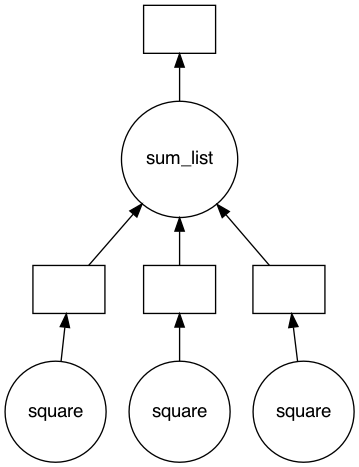

In [5]:
@delayed
def square(x):
    return x * x

@delayed
def sum_list(values):
    return sum(values)

# Create delayed objects
a = square(2)
b = square(3)
c = square(4)

# Create a delayed object for adding the results
result = sum_list([a, b, c])

# Compute the result
final_result = result.compute()
print(final_result)
result.visualize()

- **@delayed** decorates the functions square and sum_list, transforming them into delayed functions.
- **square(x)**: A delayed function that squares its input.
- **sum_list(values)**: A delayed function that calculates the sum of a list of values.
- **a = square(2), b = square(3), c = square(4)**: Creates delayed objects by calling the square function with different arguments. These represent the squared values of 2, 3, and 4. The delayed objects a, b, and c form a task graph. This graph captures the dependencies between computations and represents the sequence of operations to be performed.
- **result = sum_list([a, b, c])** creates a new delayed object that represents the sum of the squared values. The list [a, b, c] is passed as an argument, and the delayed summation function encapsulates this computation.
- **final_result = result.compute()** initiates the computation of the delayed object result. This triggers the execution of the task graph, computing the sum of the squared values.
- **print(final_result)** outputs the final result of the computation, which is the sum of the squared values of 2, 3, and 4.
- **result.visualize()** : Shows the task graph of the delayed 'result'

### Exercise 1 (Breakout rooms)
- Write Dask delayed functions:
    - ***compute_square*** : returns the square of a given number
    - ***compute_cube*** : returns the cube of a given number

- Create ***delayed objects*** for computing the square and cube of a given number.
- Create a ***delayed object*** that depends on the results of both functions to calculate their sum.
- Visualize the task graph

In [2]:
# Function to compute the square of a number
#Your code goes here

# Function to compute the cube of a number
#Your code goes here

# Given number
number = #Your code goes here

#Create delayed objects
#Your code goes here

# Create the delayed sum object
#Your code goes here

# Step 4: Compute and print the final result
#Your code goes here

#Visualize the task graph
#Your code goes here

## Dask Arrays
So far we have explored Dask's **dask.delayed** functionality for parallelizing functions. However, Dask offers a powerful collection called Dask arrays that already include a parallel version of multiple functions.

These arrays act like familiar NumPy arrays, but under the hood, they leverage Dask's distributed computing capabilities. This means Dask arrays can efficiently handle large datasets that wouldn't fit in memory on a single machine. Dask automatically splits the data into smaller chunks and processes them in parallel across multiple cores or a cluster, significantly speeding up computations on large datasets.

### Creating a Dask Array

In [12]:
import dask.array as da
# Creating a Dask array with ones
x = da.ones((1000, 1000), chunks=(100, 100))
x

dask.array<ones_like, shape=(1000, 1000), dtype=float64, chunksize=(100, 100), chunktype=numpy.ndarray>

In [49]:
x.compute()

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

**Code explanation:**
- **import dask.array as da** imports the dask.array module and gives it the alias da. This module provides functionality for creating and manipulating Dask arrays.
- **x = da.ones((1000, 1000), chunks=(100, 100))** Dask array x is created using the da.ones function. This function generates an array filled with ones. The array has a shape of (1000, 1000), meaning it is a 2D array with 1000 rows and 1000 columns. The chunks=(100, 100) argument specifies how the array should be chunked for parallel processing. In this case, it is divided into chunks of size 100x100. Chunking is a crucial aspect of Dask that allows for parallel and distributed computing on large datasets.

### Basic Array Operations

#### Performing Element-Wise Operations
Dask arrays support a wide range of element-wise operations similar to NumPy. These operations are applied independently to each element in the array, allowing for parallelized computation. 

In [14]:
# Creating Dask arrays
x = da.ones((1000, 1000), chunks=(100, 100))
dask_array = x + 5  # Element-wise addition
dask_array

dask.array<add, shape=(1000, 1000), dtype=float64, chunksize=(100, 100), chunktype=numpy.ndarray>

In [15]:
dask_array.compute()

array([[6., 6., 6., ..., 6., 6., 6.],
       [6., 6., 6., ..., 6., 6., 6.],
       [6., 6., 6., ..., 6., 6., 6.],
       ...,
       [6., 6., 6., ..., 6., 6., 6.],
       [6., 6., 6., ..., 6., 6., 6.],
       [6., 6., 6., ..., 6., 6., 6.]])

In this example, we create a Dask array x filled with ones. The element-wise addition operation x + 5 is performed, creating a new Dask array y. The operation is applied to each element of the array independently.

#### Statistical Operations
Dask arrays provide efficient ways to compute basic statistics on large datasets.

In [ ]:
# Computing mean along axis 0
mean_result = x.mean(axis=0).compute()

# Computing sum along axis 1
sum_result = x.sum(axis=1).compute()

In this example, we compute the mean along axis 0 (columns) and the sum along axis 1 (rows) of the Dask array x. These operations are performed in parallel across chunks, showcasing the scalability of Dask arrays.

### Advanced Array Operations

#### Concatenation
Concatenation involves combining multiple arrays along a specified axis. We can use Dask's **da.concatenate** function to do this:


In [63]:
# Creating two Dask arrays
a = da.ones((100, 50), chunks=(50, 25))
b = da.zeros((100, 50), chunks=(50, 25))

# Concatenating
concatenated_result = da.concatenate([a, b], axis=1).compute()
concatenated_result

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

Here, we create two Dask arrays, a and b, and concatenate them along axis 1. The resulting concatenated_result has doubled its width.

#### Stacking
Stacking involves combining arrays along a new axis. We can use Dask's **da.stack** function to stack arrays:

In [64]:
# Creating two Dask arrays
c = da.ones((100, 50), chunks=(50, 25))
d = da.zeros((100, 50), chunks=(50, 25))

# Stacking along a new axis
stacked_result = da.stack([c, d], axis=0).compute()
stacked_result

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

Here, we create two Dask arrays, c and d, and stack them along a new axis (axis 0).

#### Indexing and Slicing
Dask arrays support efficient indexing and slicing, allowing you to access and extract subarrays of specific elements or regions of interest.

In [17]:
x = da.random.randint(low=0, high=100, size=(1000, 100), chunks=(100, 50))

# Select first 200 elements from first row
first_200 = x[0, :200]  # Selects all elements from 0th (inclusive) to 200th (exclusive) index in the first row
print("First 200 elements from first row:\n", first_200.compute())

First 200 elements from first row:
 [77 53 47 31 70 26 78  8  0  0 78 50 57 14 14  4 40 35 77 61 56 14  0 60
 34 99  1 83 53 51 65 14 62 95 96 30 61 33 80 17 69 23 85 49 12 94 13 17
 60 82 75 57  2 20 29 24 91 58 32 96 68 67 12 87 85 77 11 99 70 38 46 63
 10 63 58 22 54 16 99 19 82 41 85 91 45  6 72 68 87 80 87 72 66 78 29 74
 58 80 75 54]


In [20]:
# Select entire second column
second_column = x[:, 1]  # Selects all elements from the second column (index 1)
print("Entire second column:\n",second_column.compute() )

Entire second column:
 [53 11 57 72 17 97 62 66 25 35 22 66 43 86 44 43  1 44 64 98  8 12 54 32
 13 47 86 46 27 85 33 52 75 21 42 22 15 17 43 31 26 45 73 21 75 38 10 90
 85 93 43 66 87 19 43 85 44 60 76 75 71 31 24 47 72 36 46 79 24 67 48 53
 68 28 57 33 13 10 76 93 38 28 57 48 80 59 95 55  0 53  4 94 11 88 16 16
 64 66 77 48 18 49 80 16 51 11 69 50 47 94 32 94 73 41 97 14  0  7 55 24
 97  0 60 65  7 28 14 84 84 97 31 55 20 68 46 69 31  2 15 35 87 87 50 26
 65 92 58  2  0  6 97 85 30 41 54  5 32 60 41 31 75 19 34 93 12 88 55 69
 45 88 95  7 40 46 52 36 14 61 51  4 87 36 27  4 98 14 89 80  2 26 55 58
 67 86 59  9 60 20 60 56 92 67  6 69 33 56 76  7 93 82 69 86 90 13 38 38
 40 29 33 13 64 63 50 26 25 28 37 13  8 39 50 28 98 84 81 65 81 42 49 74
 17  2 87 69 19 30 79 51 24  4 58 27 23 79 28 61 88 61 81 18 11 27 72 22
  2 52  0 92 69 63 55 16 10 60 21 81 59 83 16 16 43 49 66 51 87 56 14 37
 70 42 79 36 32 83 83 68 76 22 78 28 82 80 31  3  1 16 27 50  3 78  2 49
  3 92  6 79 44  4 99 19 66 

In [96]:
# Get a sub-array of size (5, 3) starting from (20, 40)
sub_array = x[20:25, 40:43]
print("Sub-array of size (5, 3) starting from (20, 40)\n:",sub_array.compute())

Sub-array of size (5, 3) starting from (20, 40)
: [[92 19 50]
 [ 2 32 39]
 [12 67 73]
 [61 16  1]
 [13 43 78]]


In [97]:
# Select elements greater than 5
filtered_array = x[x > 5]
print("Elements greater than 5\n:",filtered_array.compute() )

Elements greater than 5
: [31 46 73 ... 85  7 99]


In [99]:
# Access element at (10, 50)
single_element = x[10:11, 50:51]  # Selects element at index (10, 50)
print("Element at (10,50)\n:", single_element.compute())

Element at (10,50)
: [[74]]


**Note:** 

Dask arrays are often divided into chunks for parallel processing, just like in this case. While you can access elements using plain integer indexing like ***x[10, 50]***, it might not be the best and most efficient move.

Dask might need extra work to find the element within chunks, especially near chunk boundaries. To avoid this overhead and ensure clarity, use slicing with a step size of 1: **x[10:11, 50:51]**. This tells Dask exactly what you want (a single element) and helps it efficiently retrieve the data you need. So, for clear and efficient element access in Dask arrays, embrace slicing with a step of 1.

## Exercise 2 (Breakout rooms)

- **Create a Dask Array:** Generate a Dask array with random integers of size (10000, 10000) and chunks (1000, 1000).
- **Basic Operations:**
    - Perform addition by adding 5 to every element of the Dask array.
    - Perform multiplication by multiplying every element of the Dask array by 2.
- **Indexing:**
    - Select and print specific elements:
        - Select the element at row 0, column 0.
        - Select the element at row 2, column 3.
- **Slicing:**
    - Slice the Dask array to select specific rows and columns:
        - Select rows 1 to 3 and all columns.
        - Select all rows and columns 2 to 3.
- **Print Results:** Print the original Dask array and the results of the operations, indexing, and slicing.

In [3]:
# Step 1: Create a Dask array
#Your code goes here

# Step 2: Basic Operations
# Addition
#Your code goes here

# Multiplication
#Your code goes here

# Step 3: Indexing
# Select and print specific elements
#Your code goes here

# Step 4: Slicing
# Select specific rows and columns
#Your code goes here

# Print results
#Your code goes here


## Dask Dataframes

While Dask's dask.delayed allows us to parallelize individual functions, a more powerful tool exists: Dask DataFrames.

Similar to pandas DataFrames, Dask DataFrames provide a familiar interface for working with tabular data. However, unlike pandas, Dask DataFrames are designed to handle massive datasets that wouldn't fit in memory on a single machine. They achieve this by splitting the data into smaller partitions and distributing them across multiple cores or a cluster for parallel processing. This parallel processing significantly accelerates computations on large datasets. Dask DataFrames offer many familiar functionalities from pandas, allowing you to perform operations like filtering, joining, and aggregations efficiently on big tabular data.

## When to use Dask instead of Pandas

Dask enhances popular PyData libraries such as Pandas, Numpy, and scikit-learn by introducing parallel computing capabilities.

**Limitations of Pandas:**
Pandas is widely used because it is highly effective and efficient for data manipulation and analysis in Python. However, it has a significant limitation: it can only handle relatively small datasets that fit into memory. A common rule of thumb is that your dataset should be no more than 20% of your available RAM. When the dataset exceeds this size, Pandas can run into memory errors because it tries to load all the data into memory at once.

**How Dask Enhances Pandas:**
The creators of Dask wanted to improve this situation without changing the familiar and convenient Pandas interface. They developed Dask to scale up the capabilities of Pandas, allowing it to handle larger datasets. Dask achieves this by dividing large datasets into smaller, manageable chunks and processing these chunks in parallel across multiple CPU cores.

**Using Dask for Large Datasets**
For example, if you have a dataset with 665 million rows, loading it with Pandas would likely result in a memory error due to insufficient RAM. However, with Dask, you can load and process this large dataset easily. The Dask syntax is very similar to Pandas, making it easy for users to transition and work with larger data.

**Efficient Use of CPU Cores**
One of the main advantages of Dask is its ability to perform parallel computing. While Pandas processes all computations on a single core, Dask distributes the workload across multiple CPU cores. This parallel processing ensures that all available computational resources are utilized, significantly speeding up data processing.

**Distributed Processing**
Additionally, Dask can scale beyond a single machine. The same code that works on a single machine can be used to distribute processing across multiple machines in a cluster. This allows Dask to handle even larger datasets and more complex computations by leveraging the combined power of multiple machines.

Let's try loading an extremely large dataset of 665 million rows using pandas and Dask:

In [ ]:
import pandas as pd

#DO NOT RUN THIS CODE IN CLASS (will take too long to load)
df = pd.read_parquet("big_file.parquet")

If you try this code, after a very long time trying to process it, it will give you a "Kernel Restarting" error message which is considered a memory error as our machine does not have enough RAM to load this in.

However, if we try it with Dask, it will be loaded easily:

In [100]:
import dask.dataframe as dd
ddf = dd.read_parquet('big_file.parquet')

In [101]:
%%time
ddf["id"].nunique().compute()

CPU times: user 18.6 s, sys: 3.34 s, total: 21.9 s
Wall time: 5.26 s


367

This code uses Dask to calculate the number of unique values in the "id" column of a Dask DataFrame. The **%%time** magic command in Jupyter Notebooks measures and outputs the time it takes to execute this operation. The .compute() method triggers the actual computation, as Dask operations are lazy and only execute when explicitly called.
 
The "CPU times" indicates the total time the CPU spent processing the task, split between user-level operations and system-level operations. The "Wall time", being shorter than the CPU time, suggests that the task was executed in parallel across multiple CPU cores, thus completing faster than if run sequentially on a single core.

Now, lets work on all the csv datasets that are inside the ***flights_data*** folder. This folder contains 500 csv files with 1000 rows each. Each csv file was randomly generated with flight information with the following columns:
- **flight_id**: A unique identifier for each flight, generated sequentially for each row.
- **origin**: The airport where the flight originates, randomly chosen from a list of airports (JFK, LGA, EWR).
- **destination**: The airport where the flight is destined to land, randomly chosen from the same list of airports.
- **airline**: The airline operating the flight, randomly chosen from a list of airlines (Delta, United, American).
- **status**: The status of the flight, indicating whether it is 'On Time', 'Delayed', or 'Cancelled', randomly assigned.
- **delay_minutes**: The number of minutes the flight is delayed, randomly assigned a value between 0 and 120.
- **num_passengers**: The number of passengers on the flight, randomly assigned a value between 50 and 300.
- **distance**: The distance the flight will travel, randomly assigned a value between 100 and 5000 miles.
- **flight_duration**: The duration of the flight in minutes, randomly assigned a value between 30 and 600 minutes.

In [18]:
import os
import dask.dataframe as dd

In [30]:
# Specify the directory containing the generated flight CSV files
files = os.path.join('flights_data', '*.csv')

# Read the CSV files using Dask, with appropriate parsing options
ddf = dd.read_csv(files,
                  dtype={"flight_id": int,
                         "origin": str,
                         "destination": str,
                         "airline": str,
                         "status": str,
                         "delay_minutes": int,
                         "num_passengers": int,
                         "distance": int,
                         "flight_duration": int})

# Display the Dask DataFrame
ddf

,flight_id,origin,destination,airline,status,delay_minutes,num_passengers,distance,flight_duration
npartitions=500,,,,,,,,,
,int64,string,string,string,string,int64,int64,int64,int64
,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...


When you print a Dask DataFrame (ddf), it does not show the actual data but rather provides a summary of the DataFrame. This is because Dask is designed to handle large datasets that might not fit into memory, so it uses lazy evaluation. This means that Dask does not immediately compute the results of the operations you define. Instead, it builds a task graph and waits until you explicitly trigger a computation.

To view the actual data in a Dask DataFrame, you need to trigger a computation. Just like in pandas, we can use the ***head()*** method to view the first rows of the Dataframe:

In [4]:
ddf.head()

,flight_id,origin,destination,airline,departure_time,arrival_time,status,delay_minutes,num_passengers,distance,flight_duration
0,0,LGA,LGA,United,2023-01-01 00:00:00,2023-01-01 08:26:00,Cancelled,1,105,1014,414
1,1,JFK,JFK,United,2023-01-01 00:01:00,2023-01-01 09:29:00,On Time,89,244,3166,550
2,2,EWR,EWR,Delta,2023-01-01 00:02:00,2023-01-01 02:38:00,On Time,97,171,331,542
3,3,JFK,LGA,American,2023-01-01 00:03:00,2023-01-01 09:57:00,On Time,99,199,4957,288
4,4,JFK,LGA,Delta,2023-01-01 00:04:00,2023-01-01 09:41:00,Cancelled,89,88,508,49


We can check the columns names and dtypes:

In [31]:
ddf.columns

Index(['flight_id', 'origin', 'destination', 'airline', 'status',
       'delay_minutes', 'num_passengers', 'distance', 'flight_duration'],
      dtype='object')

In [32]:
ddf.dtypes

flight_id                    int64
origin             string[pyarrow]
destination        string[pyarrow]
airline            string[pyarrow]
status             string[pyarrow]
delay_minutes                int64
num_passengers               int64
distance                     int64
flight_duration              int64
dtype: object

Dask Dataframes also have an **.npartitions** attribute which tell us how many Pandas Dataframes make up a Dask Dataframe: 

In [33]:
ddf.npartitions

500

### Computations with Dask DataFrames


#### Descriptive Statistics:
Same as we learned with pandas, let's compute the mean, standard deviation, minimum, and maximum values across different numerical columns using the **describe()** method: 

In [34]:
stats = ddf.describe().compute()
stats

,flight_id,delay_minutes,num_passengers,distance,flight_duration
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,249999.500000,59.567220,174.643026,2547.123744,314.325618
std,144337.711635,34.641565,72.087409,1415.197257,164.453579
min,0.000000,0.000000,50.000000,100.000000,30.000000
25%,124999.000000,35.000000,126.750000,1541.250000,199.750000
50%,249999.000000,67.000000,189.000000,2793.000000,345.000000
75%,374999.000000,95.250000,246.000000,3925.750000,479.250000
max,499999.000000,119.000000,299.000000,4999.000000,599.000000


#### Frequency Counts:
Let's count how many flights were operated by the different airlines:

In [38]:
airline_counts = ddf['airline'].value_counts().compute()
airline_counts

airline
Delta       166987
United      166244
American    166769
Name: count, dtype: int64

#### Group by Operations:
Grouping data can provide insights into specific subsets. For example, to find out which airline, on average, experiences the most delays:

In [37]:
average_delay_by_airline = ddf.groupby('airline')['delay_minutes'].mean().compute()
print(average_delay_by_airline)

airline
United      59.563744
Delta       59.601508
American    59.536353
Name: delay_minutes, dtype: float64


#### Exercise 3 (Breakout rooms)
- Perform Basic Statistics:
     - Calculate the mean and standard deviation of delay_minutes and flight_duration.
- Advanced Calculations:
    - Calculate the average number of passengers per flight for each airline.
    - Determine the airline with the highest average delay.
    - Calculate the total distance flown by all flights.

In [4]:
# Step 1: Perform Basic Statistics
# Calculate mean, median, and standard deviation for delay_minutes and flight_duration
#Your code goes here

# Step 2: Advanced Calculations
# Average number of passengers per flight for each airline
#Your code goes here

# Airline with the highest average delay
#Your code goes here

# Total distance flown by all flights
#Your code goes here